In [24]:
import sys
sys.path.append('/Users/charleslwang/Desktop/Projects/GBvsRF-Prediction/src')

Import necessary modules and functions from your project files

In [28]:
from model_training import train_gradient_boosting, train_random_forest, evaluate_model
from data_preprocessing import preprocess_data
from visualization import plot_predictions
from data_retrieval import fetch_data
import datetime

Load and preprocess your data
Train models

In [17]:
# Fetch historical data for a ticker
ticker = 'AAPL'
end_date = datetime.date.today()
historical_data = fetch_data(ticker, end_date - datetime.timedelta(days=5 * 365), end_date)

[*********************100%%**********************]  1 of 1 completed


In [29]:
# Preprocess data
processed_data = preprocess_data(historical_data)

In [30]:
def prepare_data(data):
    """
    Prepares the data for modeling, extracting features and target.

    Parameters:
    data (pandas.DataFrame): The processed data for the ticker.

    Returns:
    X (pandas.DataFrame): The feature matrix.
    y (pandas.Series): The target variable.
    """
    X = data[['Open', 'High', 'Low', 'Volume']]  # Using 'Open', 'High', 'Low', 'Volume' as features
    y = data['Close']  # Assuming 'Close' is the target variable
    return X, y

In [31]:
X, y = prepare_data(processed_data)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
gb_model = train_gradient_boosting(X_train, y_train)
rf_model = train_random_forest(X_train, y_train)

Evaluate models

In [35]:
gb_mse, gb_r2 = evaluate_model(gb_model, X_test, y_test)
rf_mse, rf_r2 = evaluate_model(rf_model, X_test, y_test)

Model Performance Metrics:
Mean Squared Error: 0.0008084179375303358
R^2 Score: 0.9991824528795986
Model Performance Metrics:
Mean Squared Error: 0.0005575557411338887
R^2 Score: 0.999436147975613


Visualizations

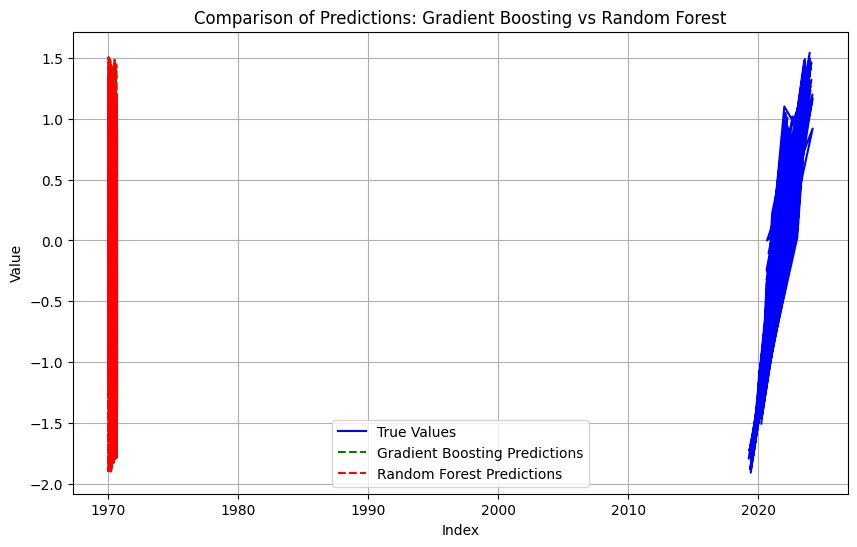

In [37]:
gb_predictions = gb_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
plot_predictions(y_test, gb_predictions, rf_predictions, "Comparison of Predictions: Gradient Boosting vs Random Forest")

In [38]:
print("Gradient Boosting Model Performance Metrics:")
print(f"Mean Squared Error: {gb_mse}")
print(f"R^2 Score: {gb_r2}\n")

print("Random Forest Model Performance Metrics:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R^2 Score: {rf_r2}")

Gradient Boosting Model Performance Metrics:
Mean Squared Error: 0.0008084179375303358
R^2 Score: 0.9991824528795986

Random Forest Model Performance Metrics:
Mean Squared Error: 0.0005575557411338887
R^2 Score: 0.999436147975613
